Задание  
Цель: изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.
Описание задания:
В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).  

Этапы работы:

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.
3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.
5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?
6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.  
a. Сделайте выводы.  
b. Удалите признаки на основании полученных значений, выводов.  
c. Повторите п. 3, п. 4 на измененных данных.  
7. Исследуйте оставленные признаки на выбросы.  
a. Удалите выбросы в случае обнаружения.  
b. Повторите п. 3, п. 4 на измененных данных.
8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.  
a. Повторите п. 3, п. 4 на измененных данных.
9. Сформулируйте выводы по проделанной работе.  
a. Кратко опишите какие преобразования были сделаны с данными.  
b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.  
c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = fetch_california_housing()
df = pd.DataFrame (data=data.data, columns=data.feature_names)
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [ ]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Для начала выполним первый этап задания, проверим на пропуски, посмотрим общую статистику, обучим модель на случайных признаках. Также построим графики как распределены данные.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y = df['MedInc']
x = df[['HouseAge','AveBedrms']]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)


model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [ ]:
import numpy as np

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print(f"RMSE на тренировочных данных: {rmse_train}")
print(f"R2 на тренировочных данных: {r2_train}")
print(f"RMSE на тестовых данных: {rmse_test}")
print(f"R2 на тестовых данных: {r2_test}")

RMSE на тренировочных данных: 1.8833661300606646
R2 на тренировочных данных: 0.021799565002015964
RMSE на тестовых данных: 1.8754952673882328
R2 на тестовых данных: 0.006148098404467395


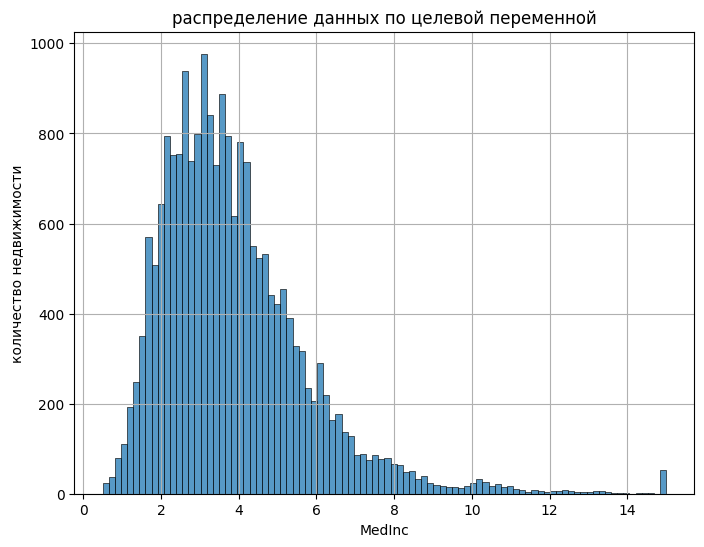

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(x='MedInc',data=df)
plt.title('распределение данных по целевой переменной')
plt.ylabel('количество недвижимости')
plt.grid()
plt.show()

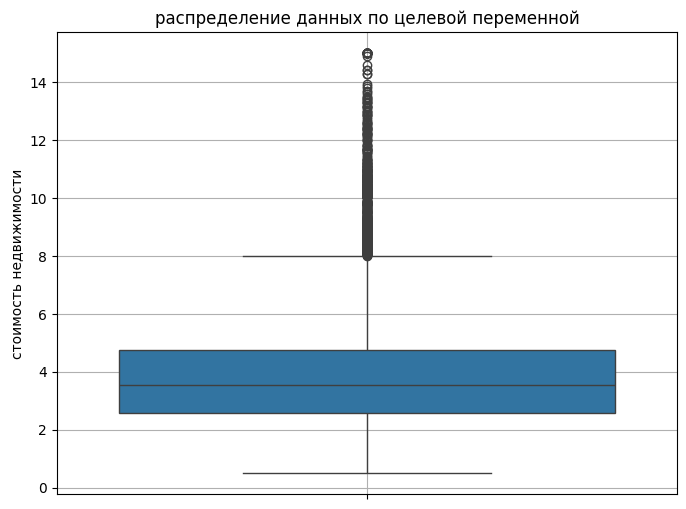

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='MedInc',data=df)
plt.title('распределение данных по целевой переменной')
plt.ylabel('стоимость недвижимости')
plt.grid()
plt.show()

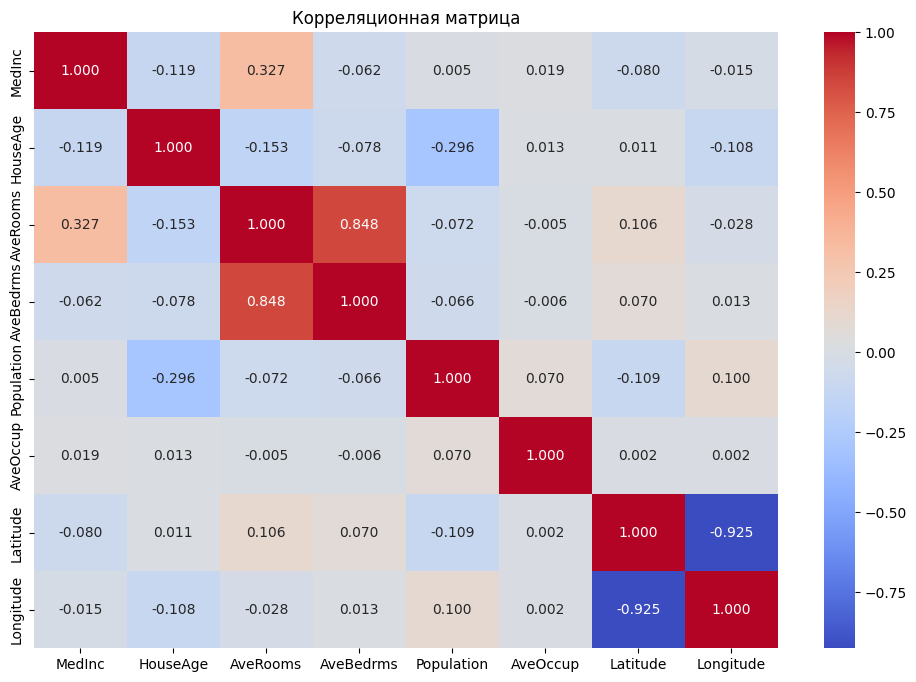

In [ ]:

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Корреляционная матрица')
plt.show()

По случайным признакам модель ошиблась, грубо говоря, на 188.000 долларов...довольно много. Из графиков видно что в целевой переменной немало выбросов, а по матрице корреляций получается особой зависимости между данными и нету...модель не может их просчитать.

А теперь сделаем некоторую обработку данных. Самая сильная корреляция с целевой переменной это "количество комнат" и "количество домовладельцев". Посмотрим есть ли в этих признаках выбросы, уберем их и также уберем лишние столбцы.

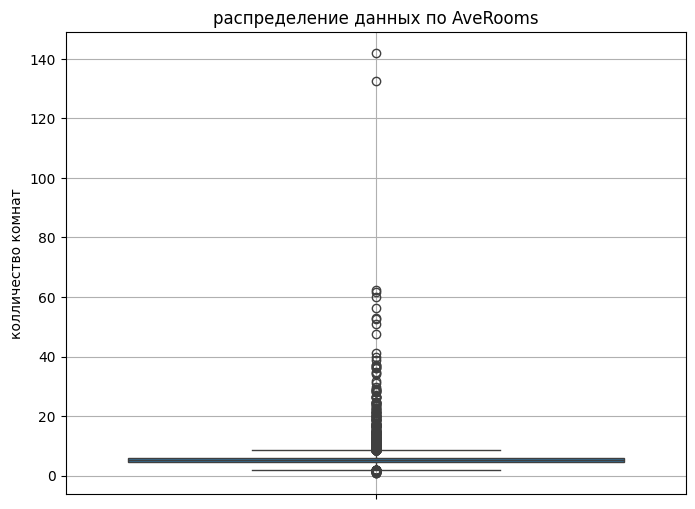

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='AveRooms' ,data=df)
plt.title('распределение данных по AveRooms')
plt.ylabel('колличество комнат')
plt.grid()
plt.show()

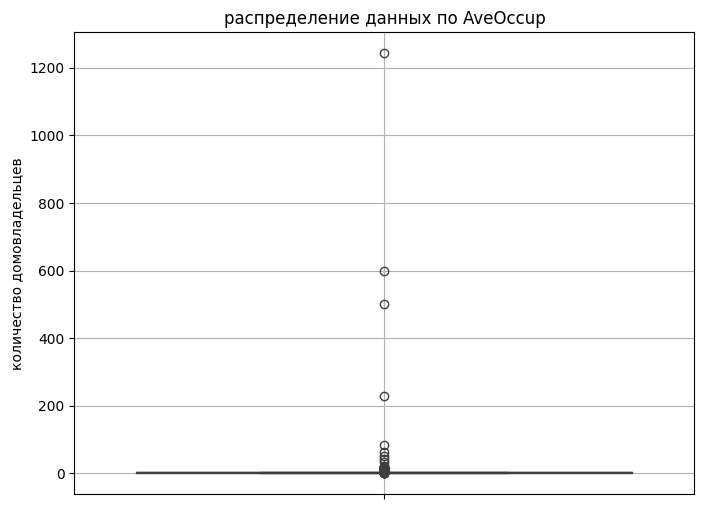

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='AveOccup' ,data=df)
plt.title('распределение данных по AveOccup')
plt.ylabel('количество домовладельцев')
plt.grid()
plt.show()

In [ ]:
df_corr = df[['MedInc','AveRooms', 'AveOccup']]

# Определяем пороги для выбранных столбцов
Q1 = df_corr.quantile(0.25)
Q3 = df_corr.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем данные по выбранным столбцам
mask = (df_corr >= lower_bound) & (df_corr <= upper_bound)
df_clean = df_corr[mask.all(axis=1)]

df_clean.describe()

,MedInc,AveRooms,AveOccup
count,18877.000000,18877.000000,18877.000000
mean,3.684395,5.206034,2.846303
std,1.483922,1.094130,0.633616
min,0.499900,2.032738,1.161290
25%,2.560000,4.439528,2.414474
50%,3.505700,5.186131,2.795082
75%,4.631500,5.939502,3.233566
max,8.011300,8.452915,4.560748


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y2 = df_clean['MedInc']
x2 = df_clean[['AveRooms', 'AveOccup']]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, random_state=42, test_size=0.2)


model2 = LinearRegression()

model2.fit(x2_train, y2_train)

y2_train_pred = model2.predict(x2_train)
y2_test_pred = model2.predict(x2_test)

rmse_train2 = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
r2_train2 = r2_score(y2_train, y2_train_pred)

rmse_test2 = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
r2_test2 = r2_score(y2_test, y2_test_pred)

print(f"RMSE на тренировочных данных: {rmse_train2}")
print(f"R2 на тренировочных данных: {r2_train2}")
print(f"RMSE на тестовых данных: {rmse_test2}")
print(f"R2 на тестовых данных: {r2_test2}")

RMSE на тренировочных данных: 1.1328249433063358
R2 на тренировочных данных: 0.4165829854204215
RMSE на тестовых данных: 1.1279757330129754
R2 на тестовых данных: 0.42439876935780063


После обработки удалось уменьшить ошибку с 188.000 долларов до 113.000 долларов, почти в 2 раза.

Теперь сделаем тоже самое, но возведем признаки в квадрат.

In [ ]:
df_corr2 = df[['MedInc','AveRooms', 'AveOccup']]

# Добавляем новые признаки
df_corr2['squar_AveRooms'] = df_corr2['AveRooms'] ** 2
df_corr2['squar_AveOccup'] = df_corr2['AveOccup'] ** 2

# Определяем пороги для выбранных столбцов
columns_to_clean = ['MedInc','squar_AveRooms', 'squar_AveOccup']

# Определяем пороги для выбранных столбцов
Q1 = df_corr2.quantile(0.25)
Q3 = df_corr2.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем данные по выбранным столбцам
mask = (df_corr2 >= lower_bound) & (df_corr2 <= upper_bound)
df_clean2 = df_corr2[mask.all(axis=1)]

df_clean2.describe()

/tmp/ipython-input-3793484729.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr2['squar_AveRooms'] = df_corr2['AveRooms'] ** 2
/tmp/ipython-input-3793484729.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr2['squar_AveOccup'] = df_corr2['AveOccup'] ** 2


,MedInc,AveRooms,AveOccup,squar_AveRooms,squar_AveOccup
count,18219.000000,18219.000000,18219.000000,18219.000000,18219.000000
mean,3.689219,5.200062,2.804177,28.160173,8.212050
std,1.467345,1.058108,0.590474,11.086197,3.397300
min,0.499900,2.032738,1.161290,4.132024,1.348595
25%,2.577050,4.461809,2.401123,19.907739,5.765390
50%,3.521400,5.198068,2.772329,27.019907,7.685809
75%,4.635200,5.934379,3.187780,35.216858,10.161939
max,8.011300,7.873016,4.251716,61.984379,18.077091


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y3 = df_clean2['MedInc']
x3 = df_clean2[['squar_AveRooms', 'squar_AveOccup']]

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, random_state=42, test_size=0.2)


model3 = LinearRegression()

model3.fit(x3_train, y3_train)

y3_train_pred = model3.predict(x3_train)
y3_test_pred = model3.predict(x3_test)

rmse_train3 = np.sqrt(mean_squared_error(y3_train, y3_train_pred))
r2_train3 = r2_score(y3_train, y3_train_pred)

rmse_test3 = np.sqrt(mean_squared_error(y3_test, y3_test_pred))
r2_test3 = r2_score(y3_test, y3_test_pred)

print(f"RMSE на тренировочных данных: {rmse_train3}")
print(f"R2 на тренировочных данных: {r2_train3}")
print(f"RMSE на тестовых данных: {rmse_test3}")
print(f"R2 на тестовых данных: {r2_test3}")

RMSE на тренировочных данных: 1.1193852311498964
R2 на тренировочных данных: 0.41640836479160226
RMSE на тестовых данных: 1.1179357641920635
R2 на тестовых данных: 0.4257989036075501


После возведения в квадрат ошибка чуток уменьшилась, до 112.000 долларов. Глядя на матрицу корреляции я думаю из этих данных много не выжмешь для хорошей точности, только если создавать новые признаки.